                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     123.3
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.39e-22
Time:                        10:10:05   Log-Likelihood:                -1978.2
No. Observations:                 200   AIC:                             3960.
Df Residuals:                     198   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.073e+04    

/var/folders/db/s43qpdjd2wg1588lhxq_vpdc0000gn/T/ipykernel_54812/1121100808.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(df['Years_of_Experience'], model.predict(X), color='red', label=f'Regression Line (p-value: {model.pvalues[1]:.4f})')


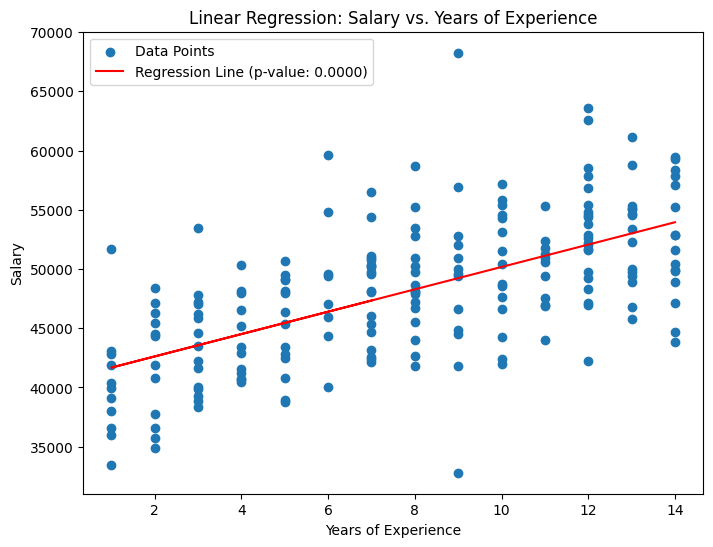

                 sum_sq     df         F    PR(>F)
Job_Title  1.254171e+08    3.0  1.124484  0.340299
Residual   7.286822e+09  196.0       NaN       NaN


/var/folders/db/s43qpdjd2wg1588lhxq_vpdc0000gn/T/ipykernel_54812/1121100808.py:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'ANOVA: Salary vs. Job Title (p-value: {anova_table["PR(>F)"][0]:.4f})')


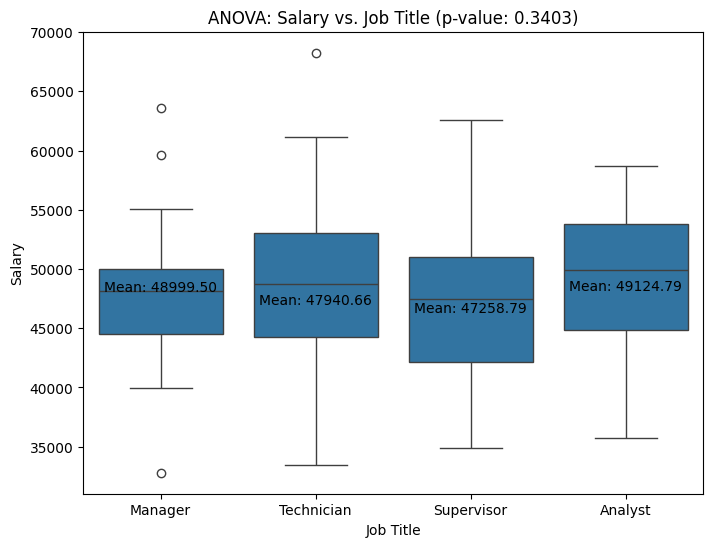

In [15]:
# Import Libraries
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random seed
np.random.seed(42)

# Generate employee data
n_employees = 200
job_titles = ['Manager', 'Technician', 'Analyst', 'Supervisor'] 
years_of_experience = np.random.randint(1, 15, size=n_employees)
# Randomize the job titles with the 200 employees
job_title_choices = np.random.choice(job_titles, size=n_employees)
# Generate salary for the employees with their years of experience
salary = 40000 + (1000 * years_of_experience) + np.random.normal(0, 5000, size=n_employees)

# Create a dataFrame
data = {
    'Salary': salary,
    'Job_Title': job_title_choices,
    'Years_of_Experience': years_of_experience
}

df = pd.DataFrame(data)

# Create Linear regression between salary vs years of experience
X = df['Years_of_Experience']
X = sm.add_constant(X)
y = df['Salary']

model = sm.OLS(y, X).fit()
print(model.summary())

# Plot the linear regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['Years_of_Experience'], df['Salary'], label='Data Points')
plt.plot(df['Years_of_Experience'], model.predict(X), color='red', label=f'Regression Line (p-value: {model.pvalues[1]:.4f})')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression: Salary vs. Years of Experience')
plt.legend()
plt.show()

# Create an ANOVA with Salary and Job Title
anova_model = ols('Salary ~ Job_Title', data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

# Create a boxplot to visualize salary differences among job titles
plt.figure(figsize=(8, 6))
sns.boxplot(x='Job_Title', y='Salary', data=df)
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.title(f'ANOVA: Salary vs. Job Title (p-value: {anova_table["PR(>F)"][0]:.4f})')

# Calculate and add means to the boxplot
group_means = df.groupby('Job_Title')['Salary'].mean()
for i, mean in enumerate(group_means):
    plt.text(i, mean, f'Mean: {mean:.2f}', ha='center', va='top', fontsize=10)

plt.show()
